## Github:
    https://github.com/leonking1990/CSCI-580/blob/main/assignment_4.ipynb

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [41]:
data = pd.read_csv('data.csv', header=None)
scaler = StandardScaler()
X = data[[0, 1]].values  
y = data[2].values  
print(data.shape)
data_np = data.values
xMin = data_np[:, 0].min() - 0.1
xMax = data_np[:, 0].max() + 0.1
yMin = data_np[:, 1].min() - 0.1
yMax = data_np[:, 1].max() + 0.1
print(f"xMin: {xMin}, xMax: {xMax}, yMin: {yMin}, yMax: {yMax}")

(100, 3)
xMin: -0.0915508, xMax: 1.1, yMin: -0.163669, yMax: 1.1


In [42]:
y = np.where(y == 1, 1, -1)
y_target = np.random.uniform(0, 1)

weights = np.random.rand(X.shape[1])
bias = -weights[1] * y_target

learning_rate = 0.01
max_iterations = 100

print(f"Initial Weights: {weights}")
print(f"Initial Bias: {bias}")

Initial Weights: [0.30127376 0.90302201]
Initial Bias: -0.21525498356895234


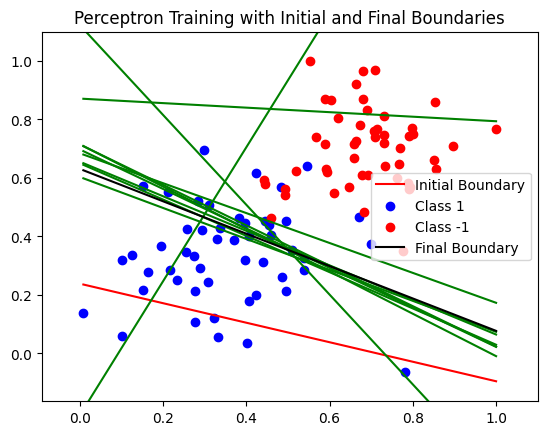

In [43]:
def plot_decision_boundary(weights, bias, color='k--', label=None):
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color, label=label)

# Plot the initial decision boundary in red
plot_decision_boundary(weights, bias, color='red', label="Initial Boundary")

# Scatter plot of the data
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

# Training loop
losses = []

for iteration in range(max_iterations):
    error_count = 0
    loss = 0

    for i in range(len(X)):
        # Sigmoid-based prediction
        prediction = np.sign(np.dot(X[i], weights) + bias)
        loss += (prediction - y[i]) ** 2
        if prediction != y[i]:
            error_count += 1
            weights += learning_rate * y[i] * X[i]
            bias += learning_rate * y[i]

    losses.append(loss / len(X))
    
    # Plot decision boundary every 10 iterations (optional, for visualization)
    if iteration % 10 == 0:
        plot_decision_boundary(weights, bias, color='green')

    # Stop if no errors
    if error_count == 0:
        print("Converged!")
        break

# Plot the final decision boundary in black
plot_decision_boundary(weights, bias, color='black', label="Final Boundary")

# Show the final plot
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.legend()
plt.title("Perceptron Training with Initial and Final Boundaries")
plt.show()



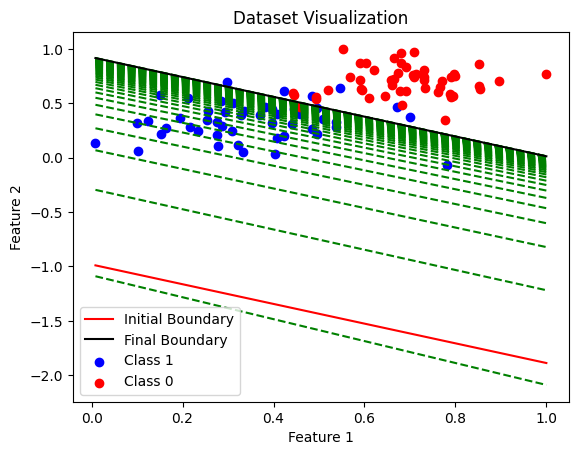

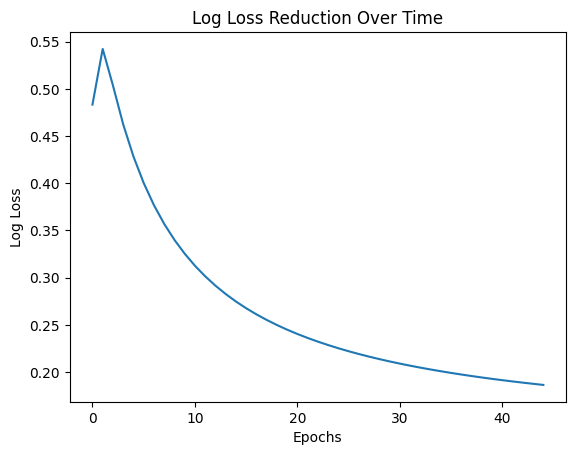

In [ ]:
# Load the dataset
data = pd.read_csv('data.csv', header=None).values


X = data[:, :2]  
y = data[:, 2]   


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gradient Descent
def gradient_descent_perceptron(X, y, learning_rate, epochs):
    weights = np.random.rand(X.shape[1])  # Initialize weights
    bias = np.random.rand()              # Initialize bias
    log_loss_history = []                # To track log-loss

    # Plot the initial decision boundary
    plot_decision_boundary(X, y, weights, bias, color='red', label='Initial Boundary')

    for epoch in range(epochs):
        total_log_loss = 0  # Track log-loss for this epoch

        for i in range(len(X)):
            # Predict output (ŷ)
            linear_output = np.dot(X[i], weights) + bias
            prediction = sigmoid(linear_output)

            # Compute error
            error = y[i] - prediction

            # Update bias
            bias += learning_rate * error
 
            # Update weights
            weights += learning_rate * error * X[i]

            # Compute log-loss for this data point
            log_loss = -(y[i] * np.log(prediction + 1e-9) + (1 - y[i]) * np.log(1 - prediction + 1e-9))
            total_log_loss += log_loss

        # Average log-loss for the epoch
        log_loss_history.append(total_log_loss / len(X))

        # Plot decision boundary every 10 epochs
        # if epoch % 10 == 0:
        plot_decision_boundary(X, y, weights, bias, color='green', linestyle='--')

    # Plot the final decision boundary in black
    plot_decision_boundary(X, y, weights, bias, color='black', label='Final Boundary')

    return weights, bias, log_loss_history

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias, color='black', linestyle='-', label=None):
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]

    plt.plot(x_values, y_values, color=color, linestyle=linestyle, label=label)

learning_rate = 0.1
epochs = 45
weights, bias, log_loss_history = gradient_descent_perceptron(X, y, learning_rate, epochs)

# Visualize the dataset
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.legend()
plt.show()

# Plot error reduction over epochs
plt.plot(log_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss Reduction Over Time')
plt.show()
